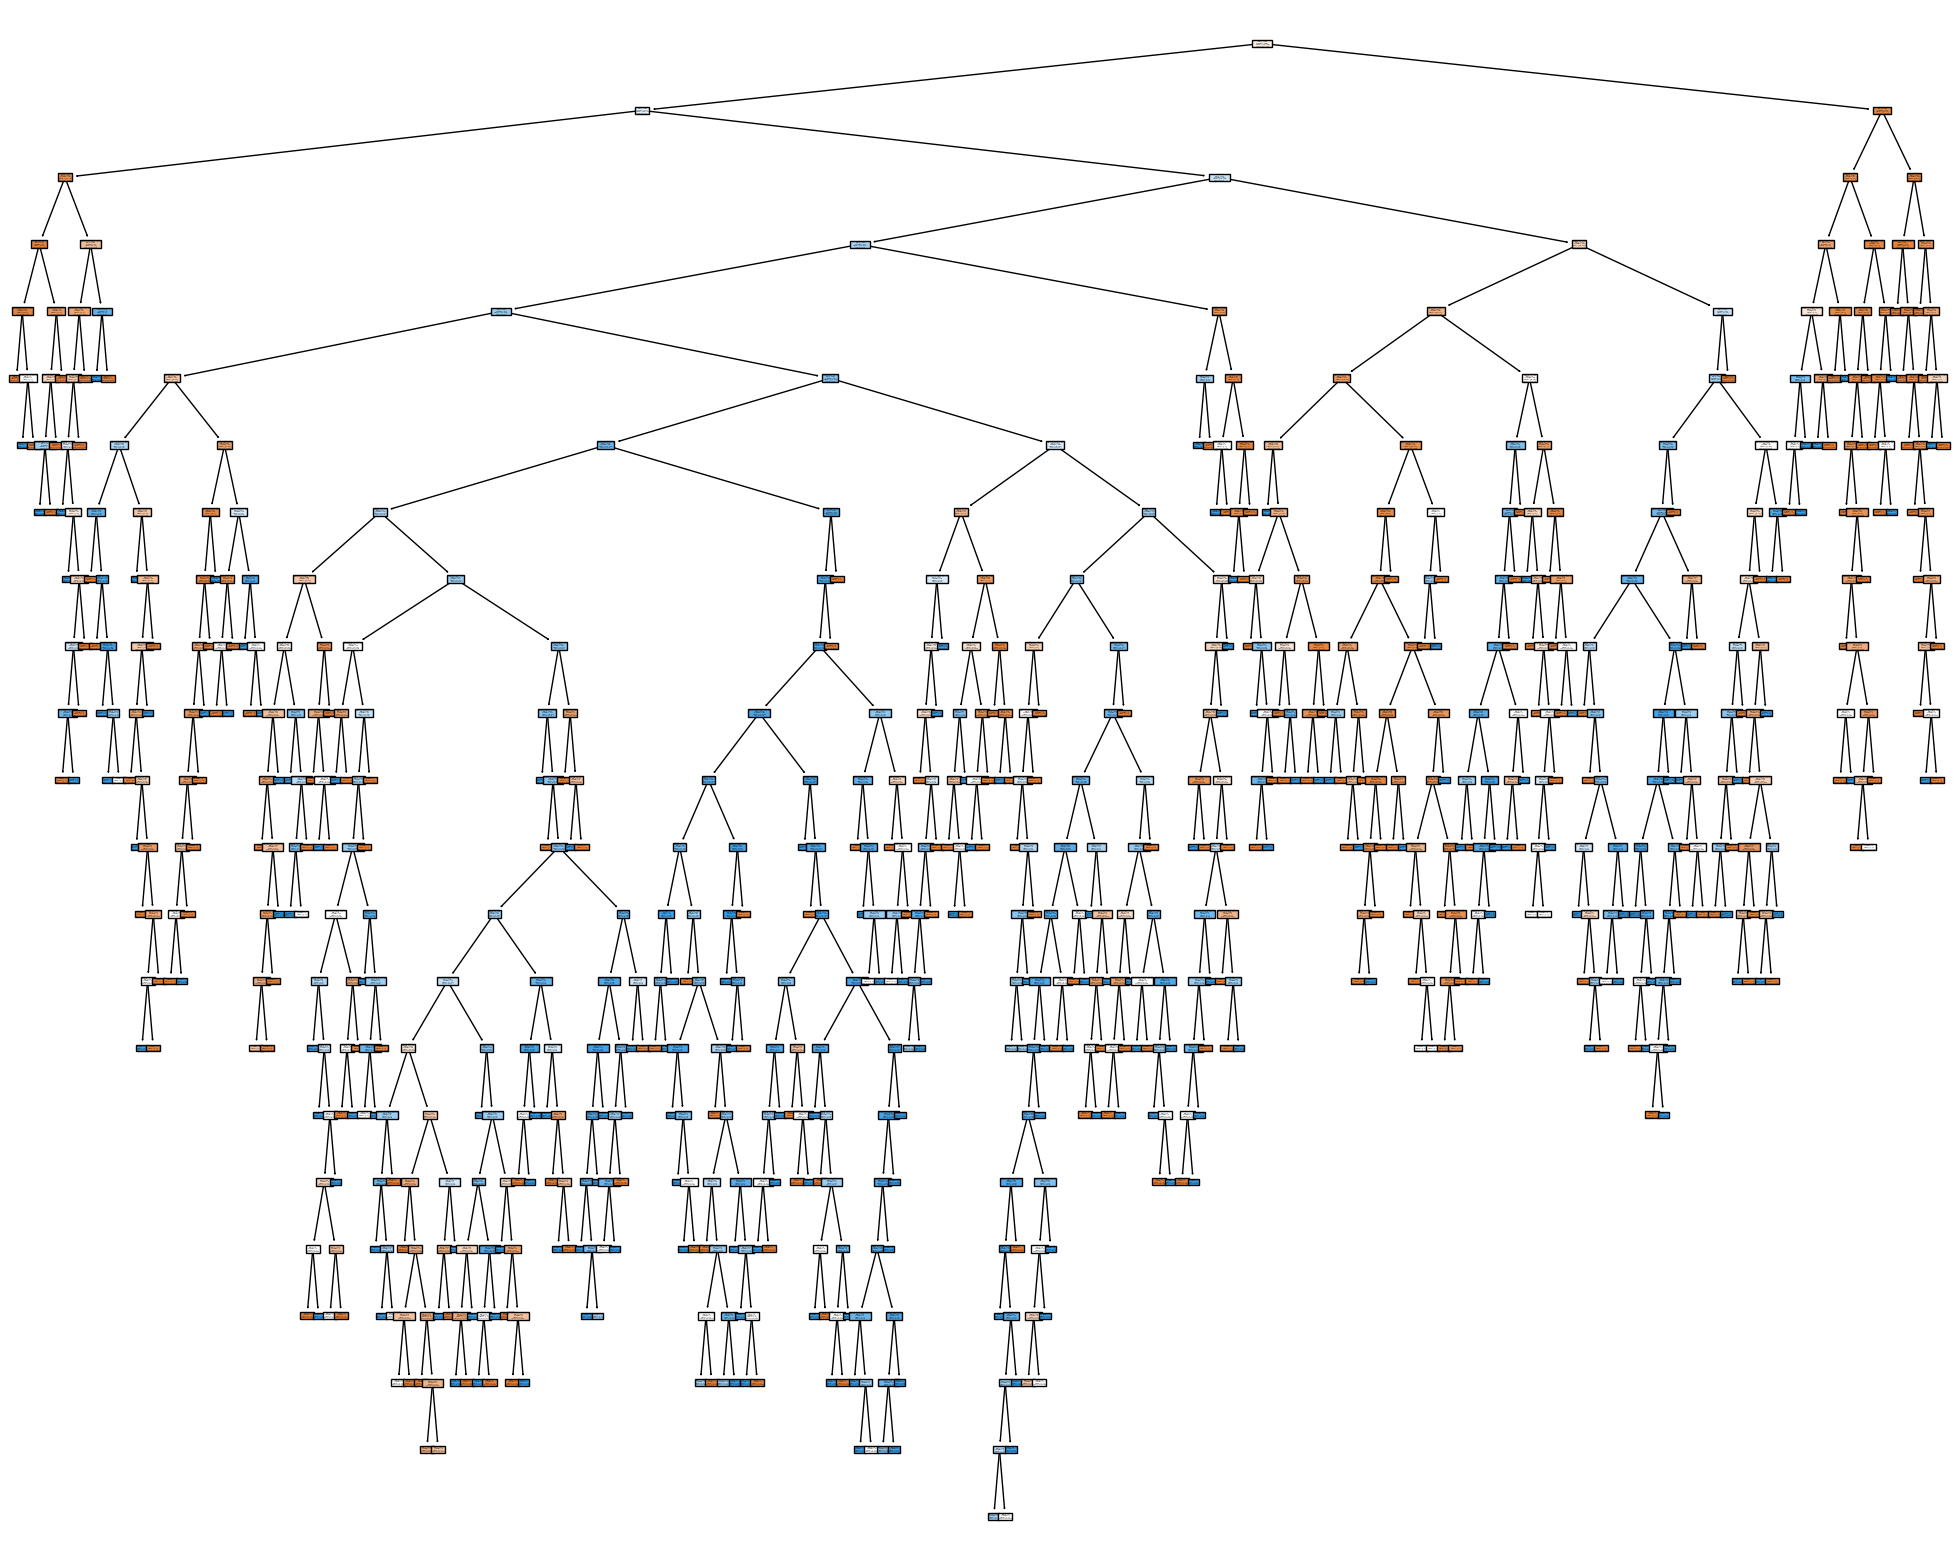

The MSE of the base decision tree is: 0.08056872037914692


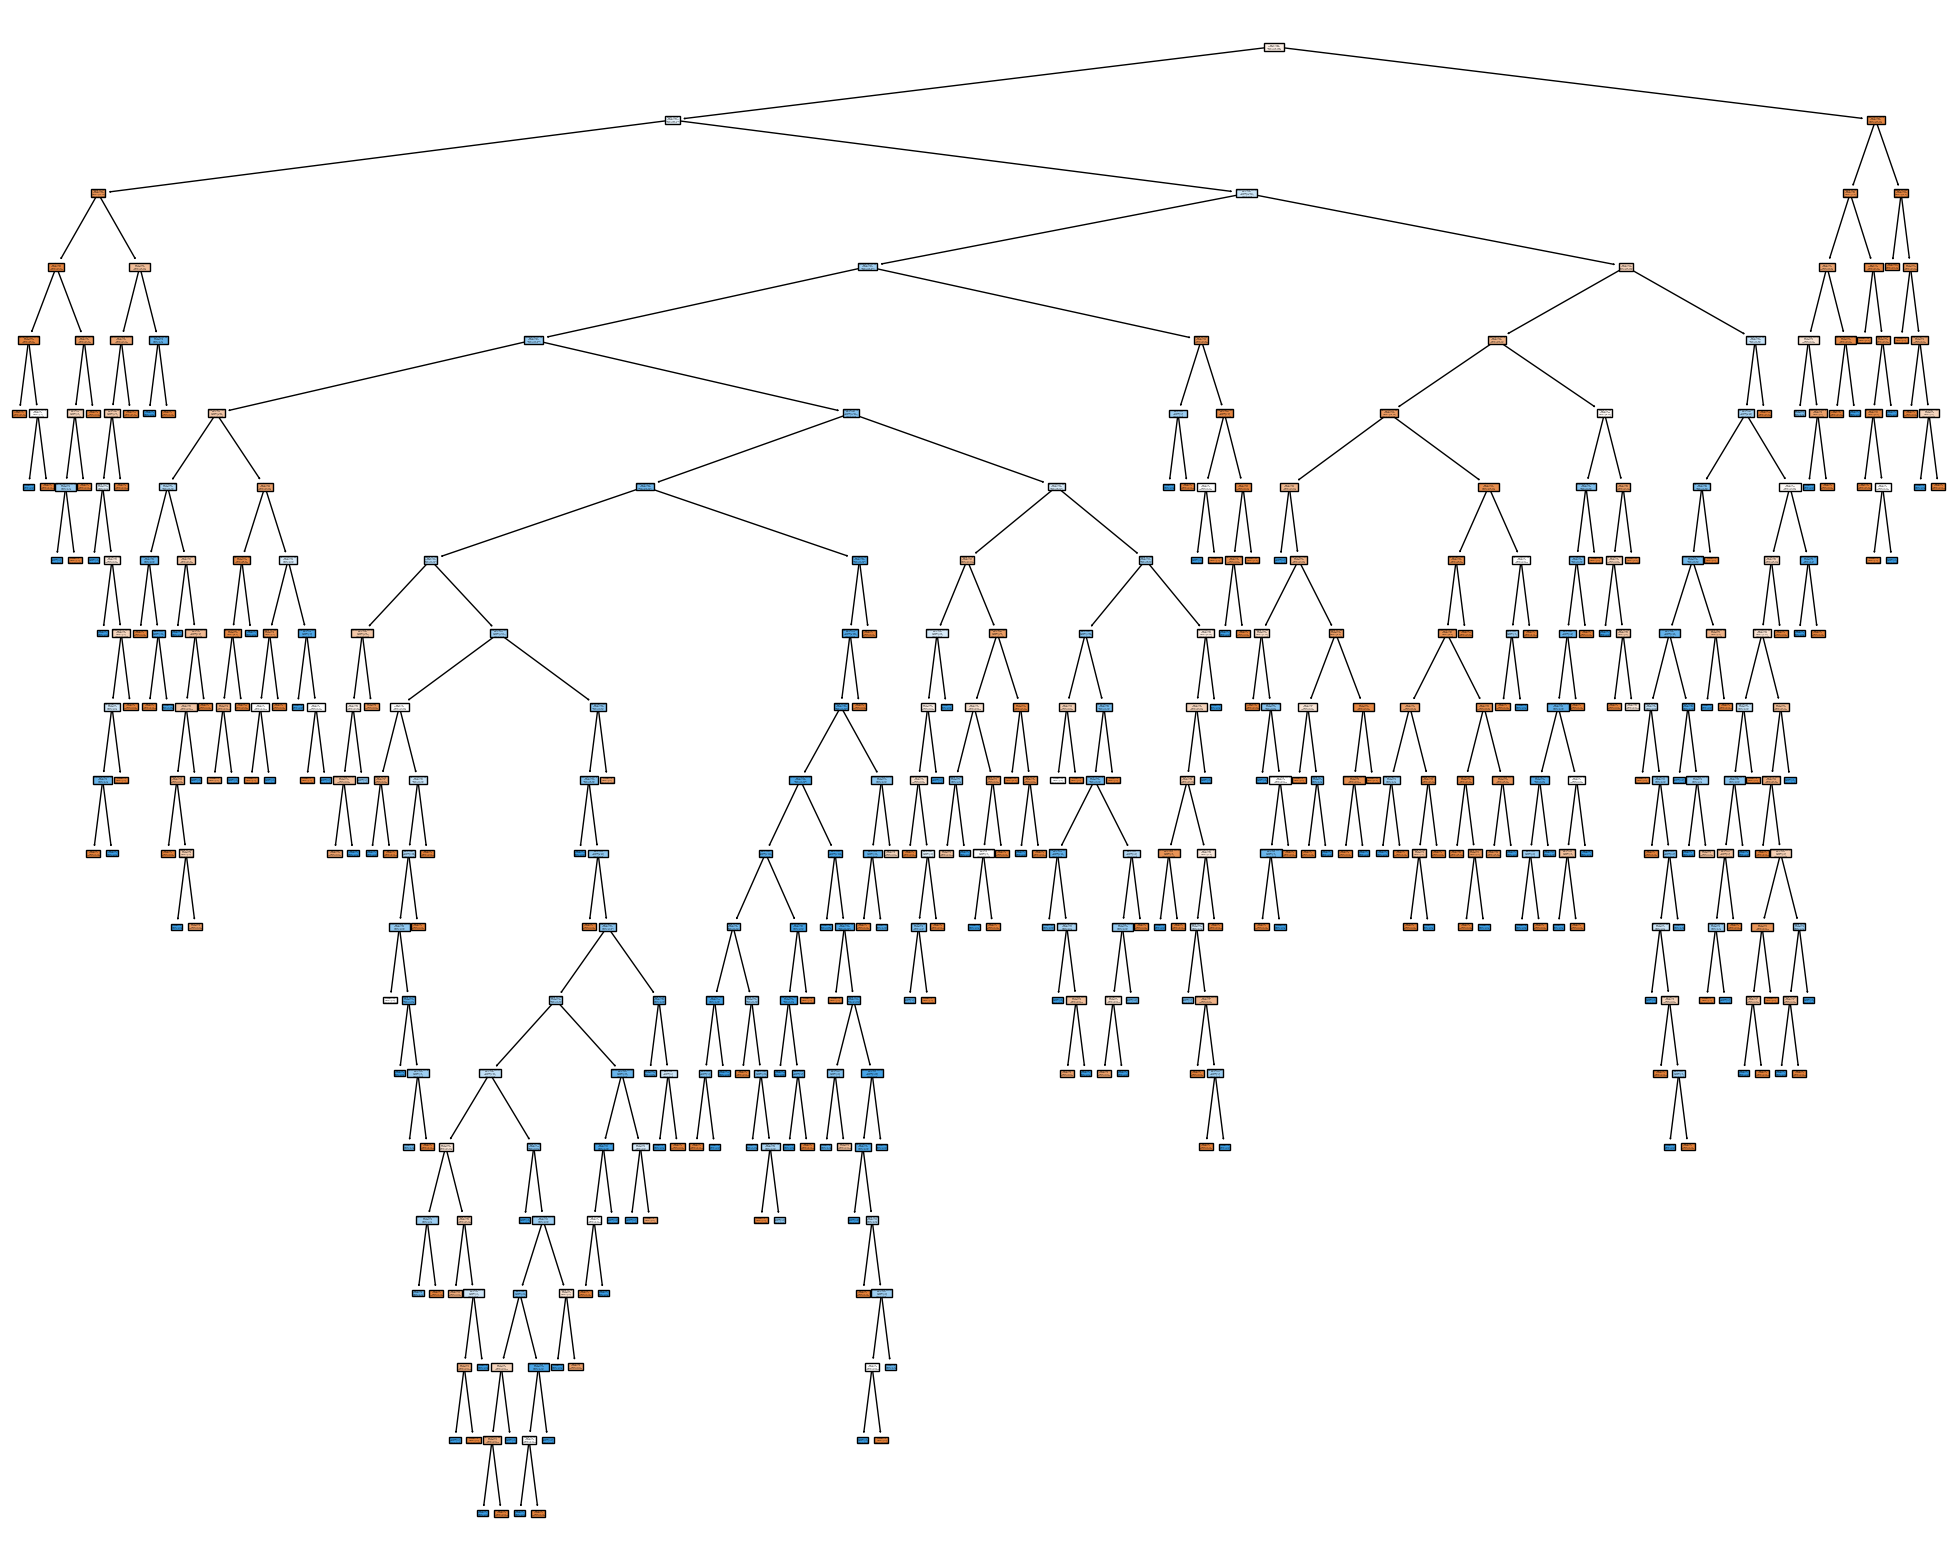

The MSE of the pruned decision tree is: 0.1990521327014218
What this shows us is that the pruned tree is less accurate


In [3]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as skm


# df = pd.read_csv('BMI_MasterData.csv')
# classes = ['0','1','2','3','4','5','6']
df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

classifier = tree.DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
classifier.fit(Xtrain, ytrain)

plt.figure(figsize=(25, 20))
plot_tree(classifier, 
          feature_names=features,  
          class_names=classes,
          filled=True)
plt.show()
MSE = np.mean((ytest - best_.predict(Xtest))**2)
print('The MSE of the base decision tree is: ' + str(MSE))


# Get the path of alphas and impurities for cost-complexity pruning
path = classifier.cost_complexity_pruning_path(Xtrain, ytrain)
# print(path)

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(classifier,
                        {'ccp_alpha': path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(Xtrain, ytrain)

best = grid.best_estimator_
# print(np.mean((ytest - best_.predict(Xtest))**2))

# ax = plt.figure(figsize=(12, 12)).add_subplot(111)
# plot_tree(G.best_estimator_, feature_names=features, ax=ax)

# Visualize the pruned tree
plt.figure(figsize=(25, 20))
plot_tree(G.best_estimator_, 
          feature_names=features,  
          class_names=classes,
          filled=True)
plt.show()

MSE = np.mean((ytest - best.predict(Xtest))**2)
print('The MSE of the pruned decision tree is: ' + str(MSE))

print('What this shows us is that the pruned tree is less accurate')

Accuracy Score for base tree with maxdepth = 3: 
0.6990521327014217
classes: 
[0 1]

Accuracy Score for base tree no max depth: 
0.8246445497630331
grid best score: 
0.8109960552268245
Accuracy score for pruned tree: 
0.8412322274881516
Truth        0    1
Predicted          
0          191   33
1           34  164
Mean Square Error is: 0.15876777251184834


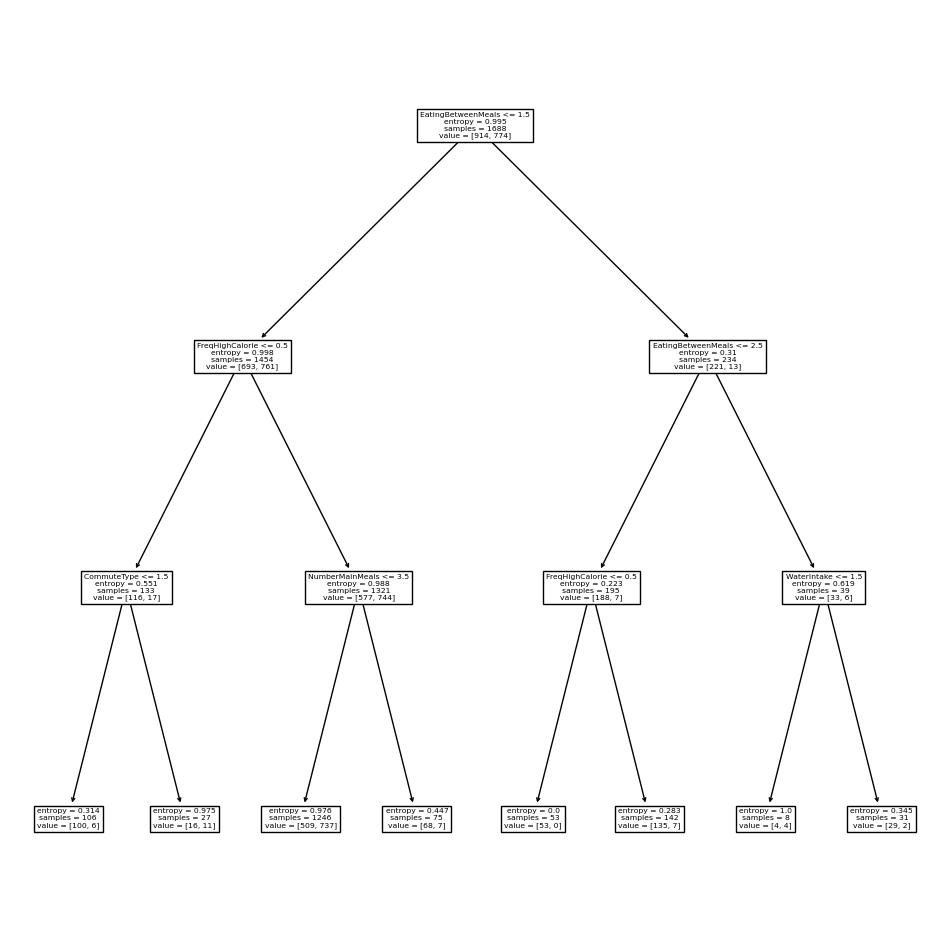

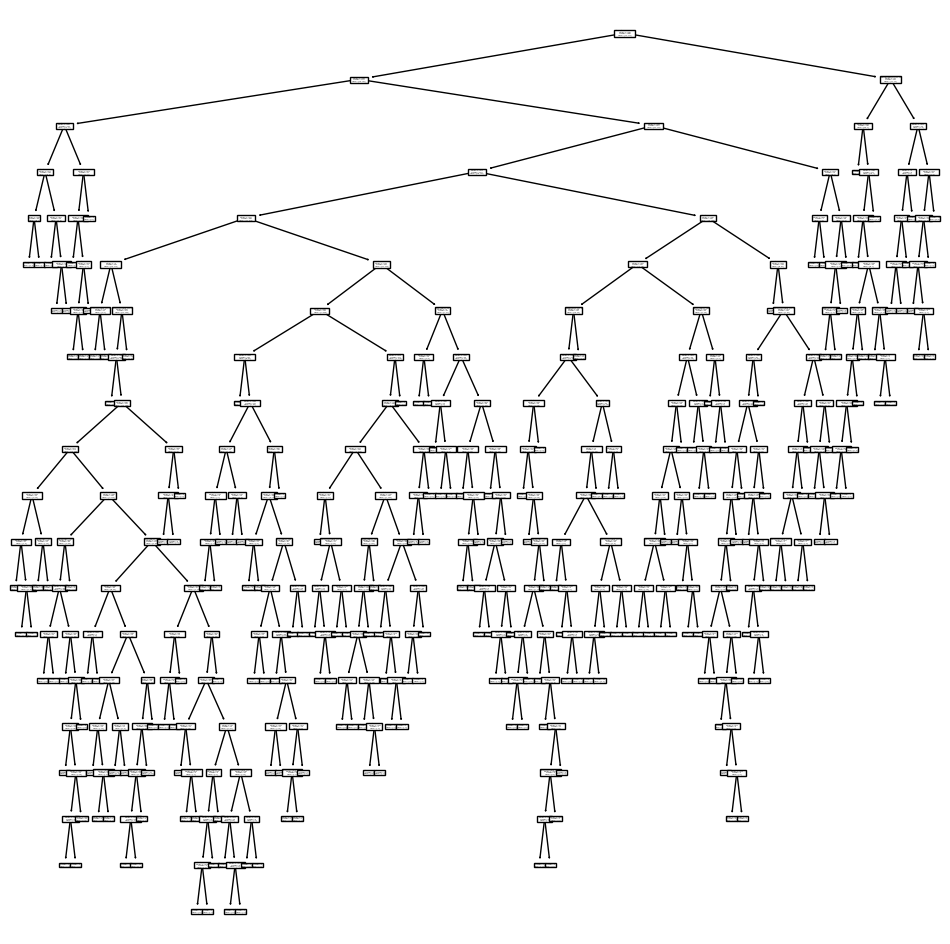

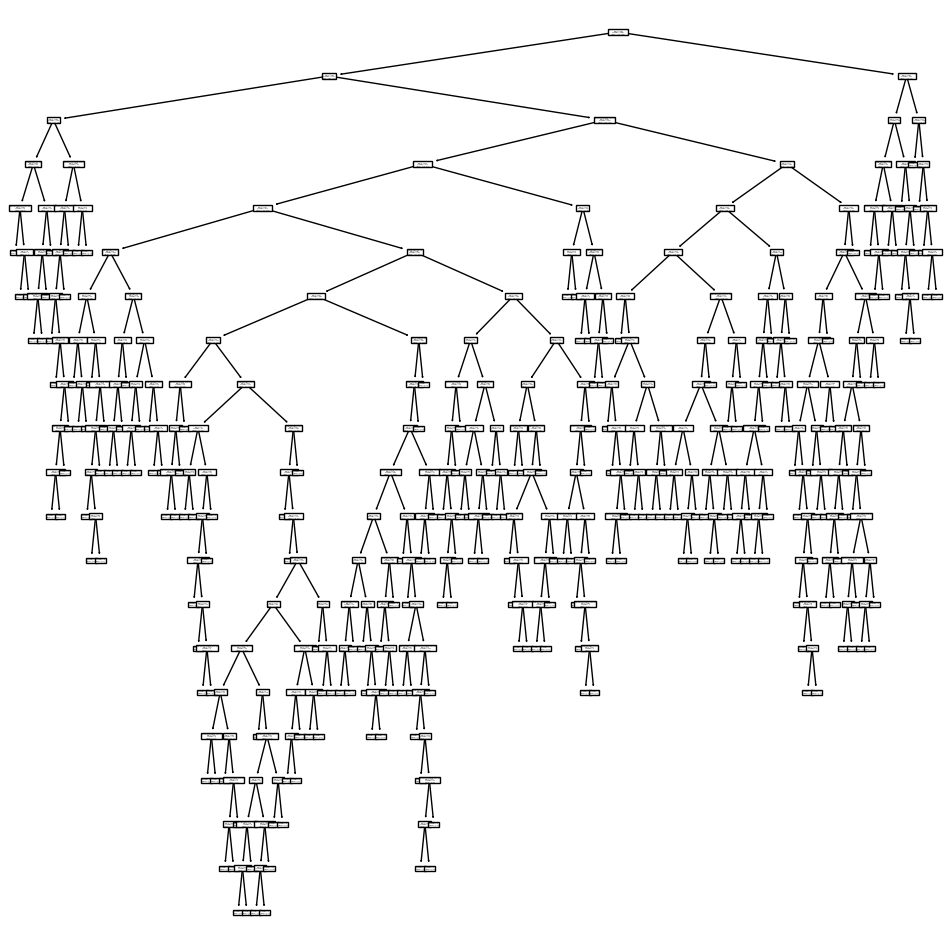

In [6]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

High = np.where(df.Classification == 1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model = MS(X, intercept=False)
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(Xtrain, ytrain)

print("Accuracy Score for base tree with maxdepth = 3: ")
print(accuracy_score(ytest, clf.predict(Xtest)))

print("classes: ")
print(clf.classes_)

ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);


clf = DTC(criterion='entropy', random_state=0)
clf.fit(Xtrain, ytrain)

print()
print("Accuracy Score for base tree no max depth: ")
print(accuracy_score(ytest, clf.predict(Xtest)))

ccp_path = clf.cost_complexity_pruning_path(Xtrain, ytrain)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)
      
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(Xtrain, ytrain)
print("grid best score: ")
print(grid.best_score_)

ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

print("Accuracy score for pruned tree: ")
print(accuracy_score(ytest, best_.predict(Xtest)))
confusion = confusion_table(best_.predict(Xtest), ytest)
print(confusion)

best_ = grid.best_estimator_
MSE = np.mean((ytest - best_.predict(Xtest))**2)

print("Mean Square Error is: " + str(MSE))

ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=features,
          ax=ax);

RandomForestRegressor(max_features=11, random_state=0)
RandomForestRegressor(max_features=11, random_state=0)
Mean Square Error bagging default is: 0.10599072988528974
Mean Square Error bagging with 500 n_estimators is: 0.10599072988528974
Mean Square Error for RF default is: 0.10599072988528974
There is no difference in MSE of Random Forest vs Bagging. They are both slightly better than a normal decision tree

Mean Square Error for boost is: 0.10599072988528974
This value is parctically the exact same as the value for both RF and bagging


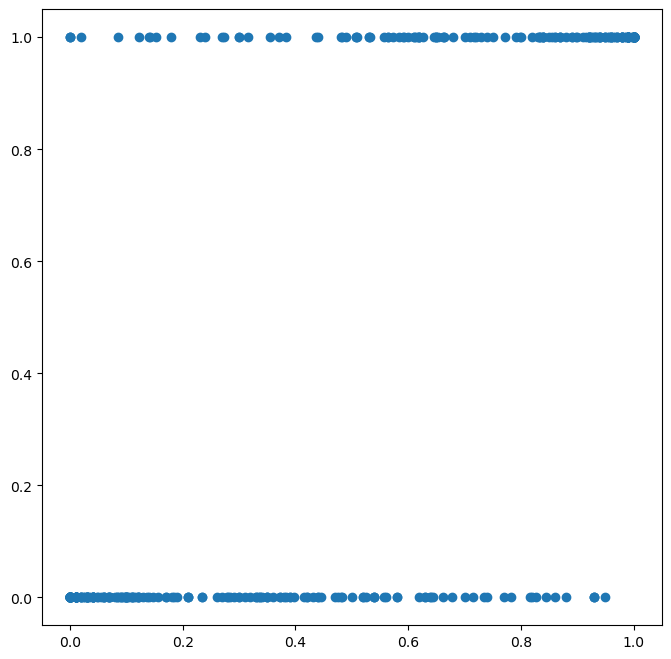

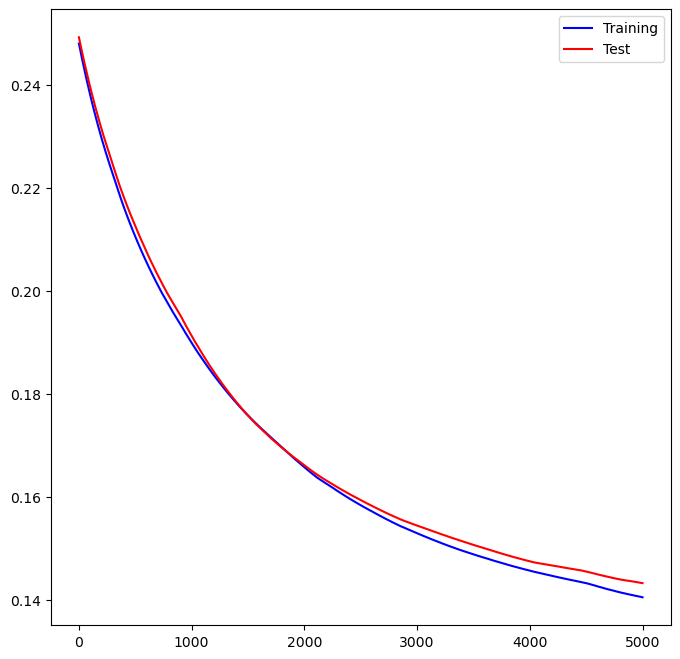

In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)


X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

bag_obese = RF(max_features=Xtrain.shape[1], random_state=0)
print(bag_obese)
print(bag_obese.fit(Xtrain, ytrain))

ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_obese.predict(Xtest)
ax.scatter(y_hat_bag, ytest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error bagging default is: " + str(MSE))


bag_boston = RF(max_features=Xtrain.shape[1],
                n_estimators=500,
                random_state=0).fit(Xtrain, ytrain)
y_hat_bag = bag_obese.predict(Xtest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error bagging with 500 n_estimators is: " + str(MSE))


RF_obese = RF(max_features=6,
               random_state=0).fit(Xtrain, ytrain)
y_hat_RF = RF_obese.predict(Xtest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error for RF default is: " + str(MSE))

feature_imp = pd.DataFrame(
    {'importance':RF_obese.feature_importances_},
    index=features)
feature_imp.sort_values(by='importance', ascending=False)

print("There is no difference in MSE of Random Forest vs Bagging. They are both slightly better than a normal decision tree")
print()

boost_obese = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost_obese.fit(Xtrain, ytrain)

test_error = np.zeros_like(boost_obese.train_score_)
for idx, y_ in enumerate(boost_obese.staged_predict(Xtest)):
   test_error[idx] = np.mean((ytest - y_)**2)

plot_idx = np.arange(boost_obese.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_obese.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend()

y_hat_boost = boost_obese.predict(Xtest);
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error for boost is: " + str(MSE))
print("This value is parctically the exact same as the value for both RF and bagging")